In [33]:
%load_ext autoreload
%autoreload 2

import warnings

import numpy as np
import pandas as pd
import os
import sys

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
module_path = os.path.abspath(os.path.join('../src'))
print("Adding modules", module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

Adding modules /Users/christopherlomeli/Source/courses/datascience/DataScienceGuidedCapstone/datawrangling/src


In [35]:
from wrangle.database_loader import DatabaseLoader
from wrangle.get_metrics import plot_missing, plot_continuous, conform_column_names

In [36]:
db = DatabaseLoader(connection_string_env_url="DB_CONNECTION_URL")

## Use Initial or processed data

In [37]:
def plot_raw_data(DATA_FILE: str, METRICS_INPUT_TABLE_NAME: str) -> (pd.DataFrame, pd.DataFrame):
    METRICS_INPUT_TABLE_NAME="nfl_metrics"

    # Read the ORIGNAL data file - use different logic for a parquet imtermediate file
    data_df = pd.read_csv(DATA_FILE)
    orignal_cols, new_cols = conform_column_names(data_df=data_df)  ## only needed for he original csv
    data_df.head()

    # Read in the metrics file we used to inspect the data manually
    metrics_df = db.read_table(METRICS_INPUT_TABLE_NAME)
    metrics_df.set_index('column_name', inplace=True)

    return data_df, metrics_df

In [38]:
def plot_processed_data(DATA_FILE: str, METRICS_INPUT_TABLE_NAME: str)  -> (pd.DataFrame, pd.DataFrame):

    # Read the parquet data file - use different logic for a parquet imtermediate file
    data_df = pd.read_parquet(DATA_FILE)

    # Read in the metrics file we used to inspect the data manually
    metrics_df = db.read_table(METRICS_INPUT_TABLE_NAME)
    metrics_df.set_index('column_name', inplace=True)

    return data_df, metrics_df

In [39]:

data_df, metrics_df = plot_raw_data("../input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv", "nfl_metrics")
# data_df, metrics_df = plot_processed_data("../working_data/nflplaybyplay2009to2016_reviewed_01.parquet", "nfl_metrics")
# data_df, metrics_df = plot_processed_data("../working_data/gameplay_facts_cleaned_01.parquet", "nfl_cleaned_metrics")
metrics_df.head()

/var/folders/c2/xznlms511f5_7k456wbrkk000000gn/T/ipykernel_92575/20224841.py:5: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(DATA_FILE)


,data_type,unique_counts,feature_type,c_dimension,row_count,good_count,missing_count,completeness,quality,mean,std,min,max,median,top,freq
column_name,,,,,,,,,,,,,,,,
deftwopoint,object,2,category,dim(twoopoint),407688,24,407664,0.00006,poor,NaN,NaN,NaN,NaN,NaN,Failure,19.00000
blockingplayer,object,101,category,dim(block),407688,117,407571,0.00029,poor,NaN,NaN,NaN,NaN,NaN,D.Watson,3.00000
twopointconv,object,2,category,dim(twopoint),407688,605,407083,0.00148,poor,NaN,NaN,NaN,NaN,NaN,Failure,322.00000
chalreplayresult,object,2,category,dim(challenge),407688,3402,404286,0.00834,poor,NaN,NaN,NaN,NaN,NaN,Upheld,1986.00000
recfumbplayer,object,1827,category,dim(fumble),407688,4373,403315,0.01073,poor,NaN,NaN,NaN,NaN,NaN,M.Adams,15.00000


## plot missing values

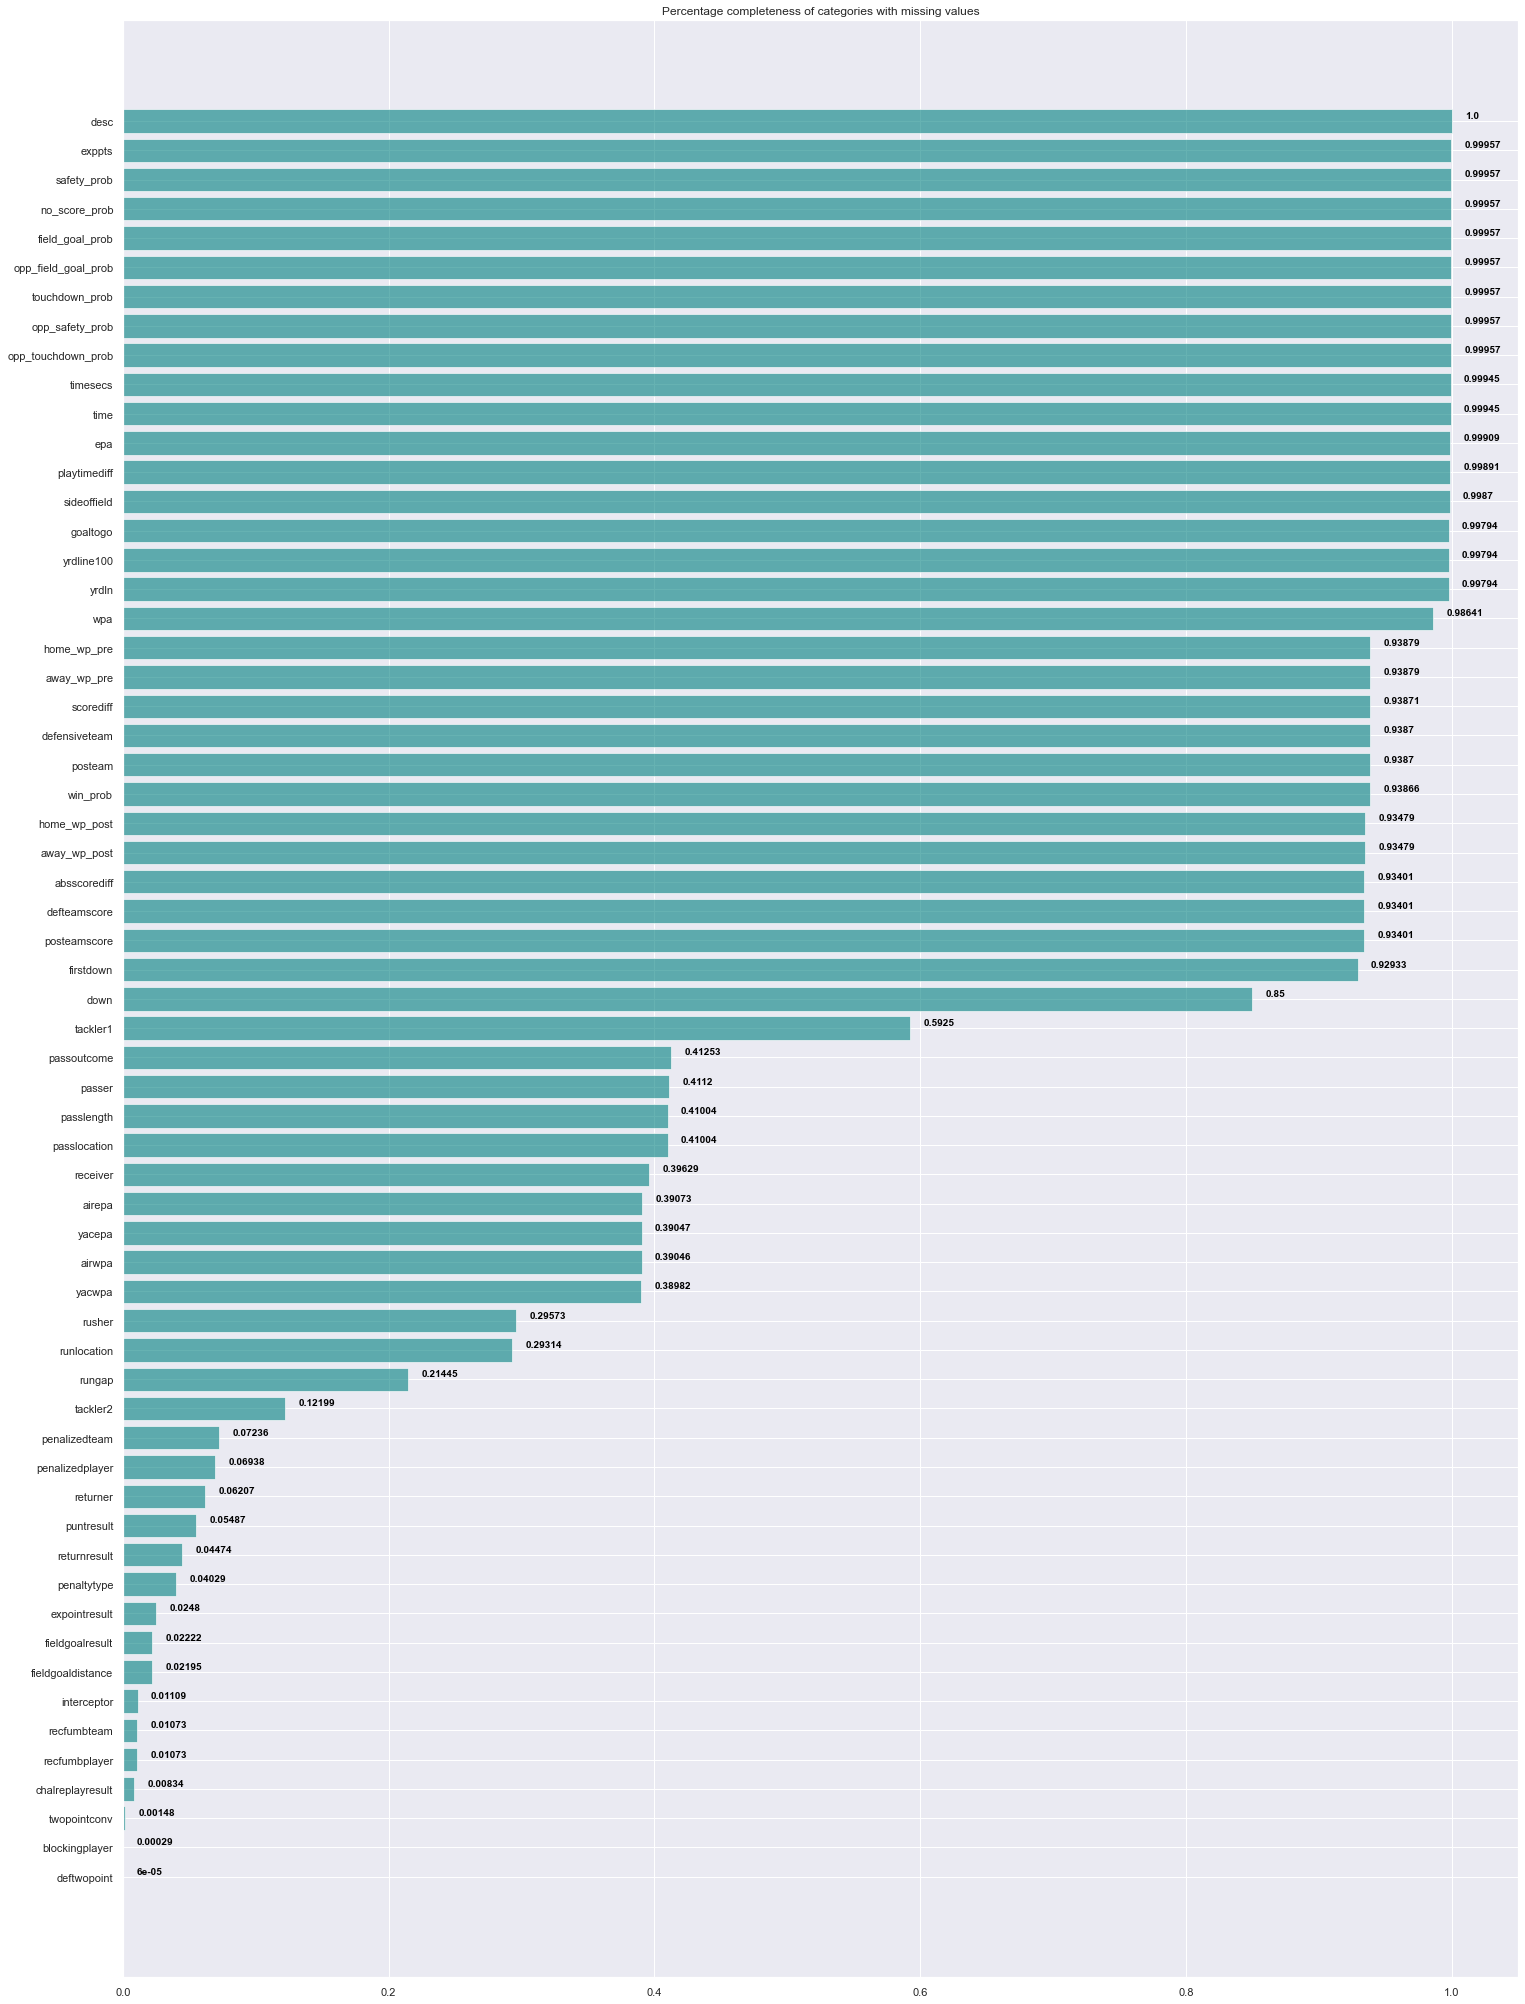

In [42]:
plot_missing(metrics_df, missing_only=True)

## plot continuous features

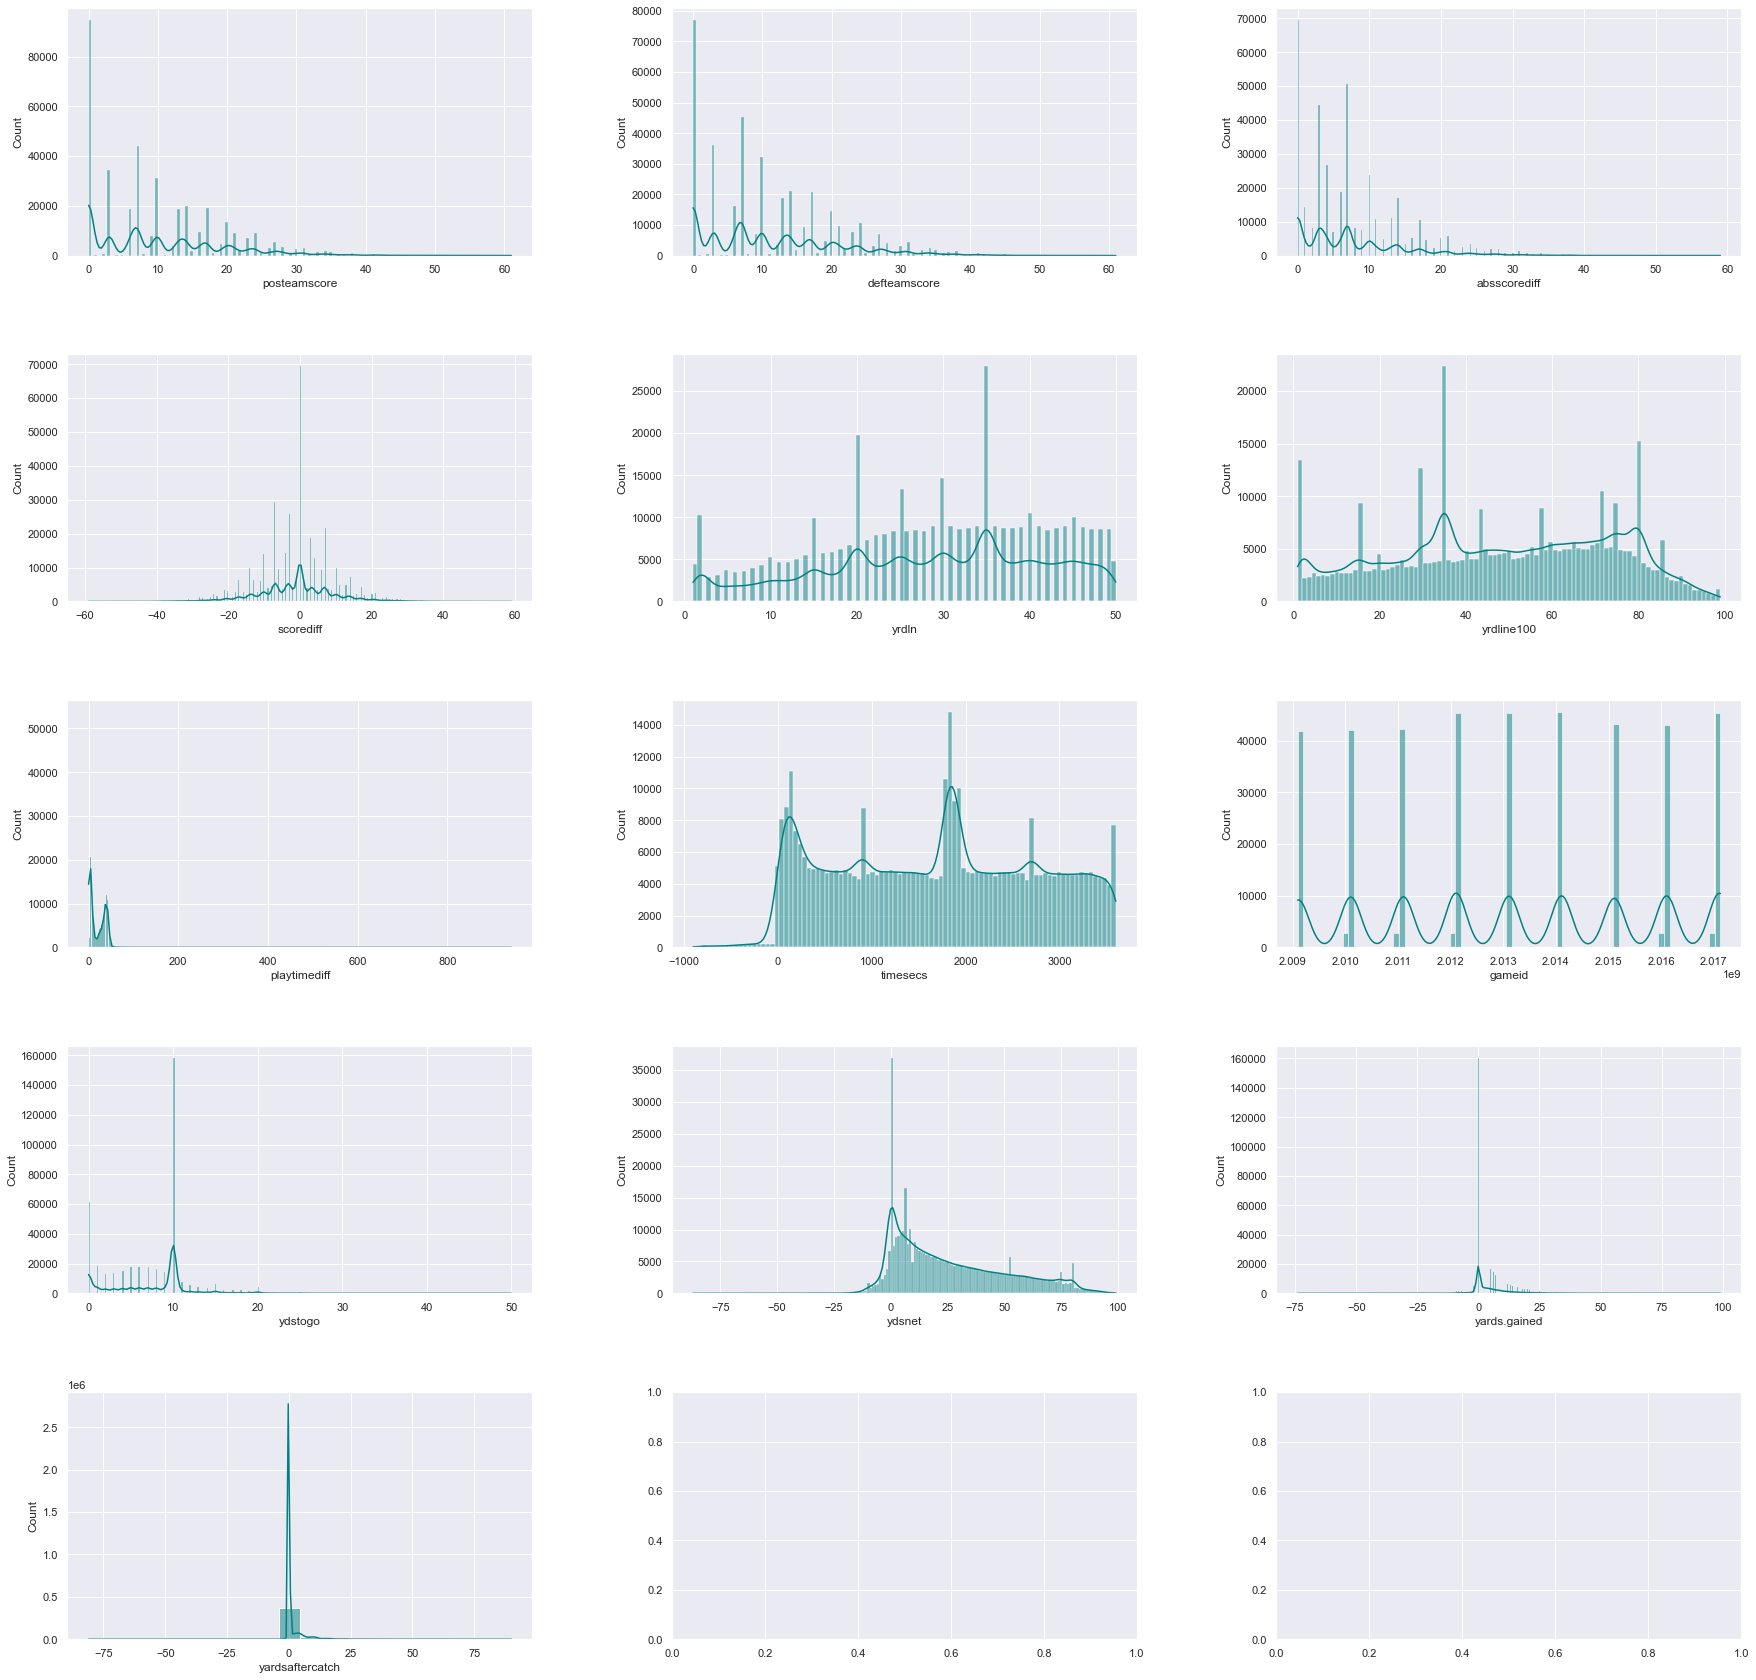

In [41]:
m2 = metrics_df.loc[(metrics_df.feature_type == 'continuous') & (metrics_df.c_dimension == 'fact')]
m2
plot_continuous(data_df, m2)